<a href="https://colab.research.google.com/github/H2IA/escola-de-verao-2021/blob/main/notebooks/conjunto%20de%20dados/H2IA_Escola_de_Ver%C3%A3o_Consolida%C3%A7%C3%A3o_do_Conjunto_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

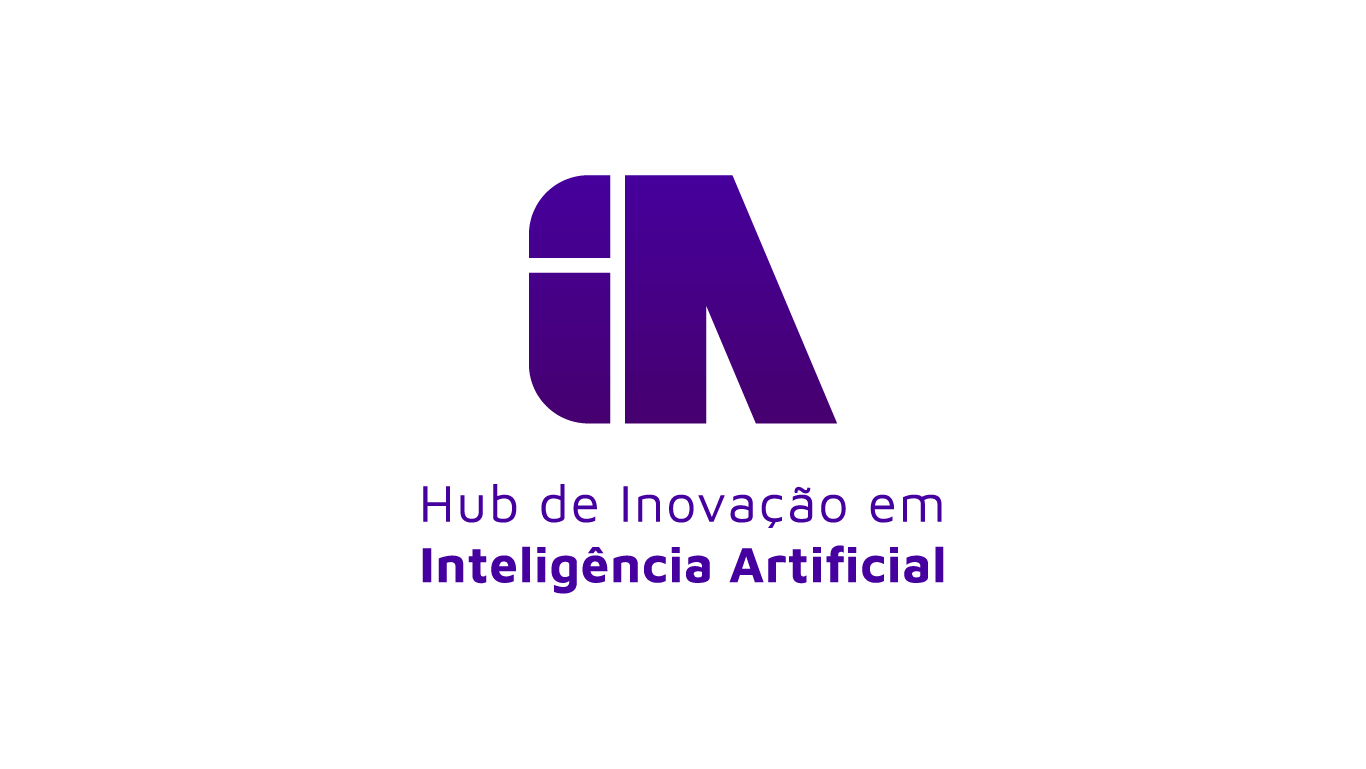


# Instalar pacote do r para calcular concordância entre anotadores

In [1]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects as robjects
from rpy2.robjects import r, pandas2ri
import rpy2.interactive as r
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter
utils = importr("utils")
utils.install_packages('irr')
irr = importr('irr')

/usr/local/lib/python3.7/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.7/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')
R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘lpSolve’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/lpSolve_5.6.15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 467646 bytes (456 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [2]:
try:
    import disagree
except:
    !pip3 -qqq install --upgrade disagree

In [3]:
import glob
import os
import shutil
import pandas as pd
import numpy as np
import gdown

# Baixar pasta de Anotações 

In [4]:
id = '1F3gNh9tbi2nvBENvw7SYjNqRbipFPYFI'
url = f'https://drive.google.com/uc?id={id}'
output = 'csvs.7z'
gdown.download(url, output, quiet=False)
!7z x {output} > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1F3gNh9tbi2nvBENvw7SYjNqRbipFPYFI
To: /content/csvs.7z
100%|██████████| 33.1k/33.1k [00:00<00:00, 5.33MB/s]


# Baixar conjunto de dados original

In [5]:
id = '1tOapGOgISWzmkDvwapHUgHqRG0FJ7BZ5'
url = f'https://drive.google.com/uc?id={id}'
output = 'dataset.tar.gz'
gdown.download(url, output, quiet=False)
!tar -zxf dataset.tar.gz > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1tOapGOgISWzmkDvwapHUgHqRG0FJ7BZ5
To: /content/dataset.tar.gz
9.41MB [00:00, 135MB/s]


# Lendo as Anotações 

In [6]:
todas_anotacoes = pd.DataFrame()
for arquivo in glob.glob('csvs/*.csv'):
    anotacoes = pd.read_csv(arquivo, header = None)
    anotacoes['anotador'] = arquivo.split('/')[-1].split('.')[0]
    todas_anotacoes = todas_anotacoes.append(anotacoes)

todas_anotacoes.columns = ['imagem', 'anotacao', 'anotador']

# Limpando Inconsistências

In [7]:
todas_anotacoes.anotacao.value_counts()

[nenhum]                   1069
[cardeal]                   422
[nihum]                     342
[joao_de_barro]             325
[sabia]                     209
[Cardeal]                   118
[João de Barro]              80
[Sabiá]                      61
[Nenhum]                     49
[Joao de Barro]              40
[joão de barro]              30
[Sabia]                      17
[sabiá]                      17
[none]                       12
[cardial]                    11
[joao de barro]               7
[cardeal,nenhum]              5
[nenhum,cardeal]              3
[joao_de_barro,nenhum]        3
[sabia,joao_de_barro]         2
[joao_de_barro,cardeal]       1
[sabia,joao de barro]         1
[nenhum,sabia]                1
[nenhum,joao_de_barro]        1
Name: anotacao, dtype: int64

In [8]:
todas_anotacoes.anotacao = todas_anotacoes.anotacao.apply(lambda x : x.replace(',nenhum]','').replace('[nenhum,','').replace('[','').replace(']',''))
todas_anotacoes = todas_anotacoes.replace('none','nenhum')
todas_anotacoes = todas_anotacoes.replace('nihum','nenhum')
todas_anotacoes = todas_anotacoes.replace('Nenhum','nenhum')
todas_anotacoes = todas_anotacoes.replace('cardial','cardeal')
todas_anotacoes = todas_anotacoes.replace('Cardeal','cardeal')
todas_anotacoes = todas_anotacoes.replace('Sabia','sabia')
todas_anotacoes = todas_anotacoes.replace('sabiá','sabia')
todas_anotacoes = todas_anotacoes.replace('Sabiá','sabia')
todas_anotacoes = todas_anotacoes.replace('joao_de_barro','joao de barro')
todas_anotacoes = todas_anotacoes.replace('João de Barro','joao de barro')
todas_anotacoes = todas_anotacoes.replace('Joao de Barro','joao de barro')
todas_anotacoes = todas_anotacoes.replace('joão de barro','joao de barro')
idx = todas_anotacoes[todas_anotacoes.anotacao == 'sabia,joao_de_barro' ].index
todas_anotacoes.drop(idx, inplace = True)
idx = todas_anotacoes[todas_anotacoes.anotacao == 'sabia,joao de barro' ].index
todas_anotacoes.drop(idx, inplace = True)
idx = todas_anotacoes[todas_anotacoes.anotacao == 'joao_de_barro,cardeal' ].index
todas_anotacoes.drop(idx, inplace = True)

In [9]:
todas_anotacoes.anotacao.value_counts()

nenhum           1431
cardeal           544
joao de barro     466
sabia             300
Name: anotacao, dtype: int64

# Contar anotações por imagem

In [10]:
todas_anotacoes.groupby(by=['imagem']).anotador.count()

imagem
00039ca2182c94a0b7d347be469d800b.jpg    1
004ad65db5f57303621b604eba0eece8.jpg    3
005eb18ed80e8c056da22ea9f440da4a.jpg    3
006a6b9f82a238f69a5e145567ba1ea5.jpg    3
0091a13e9843acf0980067570e9becdc.jpg    2
                                       ..
fdf65459dd25a722392befab3604872a.jpg    1
feeb32a42234dd6fc018e833c16c73a3.jpg    1
ff6dd75bed5f8685af138fe6ff74687c.jpg    1
ff6e7bd3bfa581dcc6e65074312cc900.jpg    1
fff8ea695e653f56cb8382af0fb51b48.jpg    1
Name: anotador, Length: 1499, dtype: int64

# Número de Imagens Diferentes

In [11]:
todas_anotacoes.imagem.nunique()

1499

# Consolidando imagens com 2 anotações concordantes

In [12]:
def majority_voter_anotadores(anotador1, anotador2, anotacoesDF_Explicitas):
    anotacoes_1 = todas_anotacoes[todas_anotacoes.anotador == anotador1].copy()
    anotacoes_2 = todas_anotacoes[todas_anotacoes.anotador == anotador2].copy()
    label_anotador1 = 'anotador_'+str(anotador1)
    label_anotador2 = 'anotador_'+str(anotador2)
    label_anotacao1 = 'anotacao_'+str(anotador1)
    label_anotacao2 = 'anotacao_'+str(anotador2)

    agreement = pd.merge(left=anotacoes_1, right=anotacoes_2, on=['imagem', 'anotacao'], suffixes=('_'+str(anotador1),'_'+str(anotador2)))
    if agreement.empty:
        return None
    
    agreement_cleaned = agreement.drop(columns=[label_anotador1, label_anotador2], axis = 1)    
    return agreement_cleaned

def consolida_corpus(anotadores, todas_anotacoes):
    from itertools import combinations
    corpus = pd.DataFrame()
    combinations = [list(x) for x in combinations(anotadores, 2)]
    combinations_found = []
    for combination in combinations:
        [anotador1, anotador2] = combination
        df = majority_voter_anotadores(anotador1, anotador2, todas_anotacoes)
        corpus = corpus.append(df)
        if not df is None:
            combinations_found.append(combination)
    return corpus, combinations_found

In [13]:
anotadores =  todas_anotacoes.anotador.unique()
corpus,combinations_found = consolida_corpus(anotadores, todas_anotacoes)
corpus.drop_duplicates(inplace = True)

In [14]:
corpus.imagem.nunique()

745

In [15]:
rotulos = corpus.anotacao.unique()

In [16]:
caminho_saida = 'consolidado'
caminho_entrada = 'conjunto_de_dados'
nao_encontrados = 0
for rotulo in rotulos:
    os.makedirs(os.path.join(caminho_saida,rotulo), exist_ok = True)
for idx, row in corpus.iterrows():
    fname = os.path.join(caminho_saida, row.anotacao, row.imagem)
    entrada = os.path.join(caminho_entrada, row.imagem)
    try:
        shutil.move(entrada, fname)
    except:
        nao_encontrados = nao_encontrados + 1 
        print(f'Arquivo {entrada} não encontrado.')
print(f'não encontrei {nao_encontrados} imagens')

Arquivo conjunto_de_dados/5ffefde5f51fdedbd9af638f18d9c135.jpg não encontrado.
Arquivo conjunto_de_dados/5f1540284f9b007f5c1956b70e641092.jpg não encontrado.
Arquivo conjunto_de_dados/b76f86db9793bcb046d2d0a8e296d205.jpg não encontrado.
Arquivo conjunto_de_dados/dc0713b35a09f2bb2eccaef052c57fa0.jpg não encontrado.
Arquivo conjunto_de_dados/86f6a79e7c64982c7cf0607b9c264f26.jpg não encontrado.
Arquivo conjunto_de_dados/bd9c073750c0410430bcb4d665ae4e11.jpg não encontrado.
Arquivo conjunto_de_dados/ea827084229bd19148349c474362b934.jpg não encontrado.
Arquivo conjunto_de_dados/886480f85b2e12ec4ba6ff2030d58596.jpg não encontrado.
Arquivo conjunto_de_dados/c00bc5722407f3c79d869eb464b5b1bd.jpg não encontrado.
não encontrei 9 imagens


# Compactar dataset consolidado

In [17]:
!tar czf h2ia_consolidado_passaros.tar.gz consolidado

In [18]:
from google.colab import files
files.download('h2ia_consolidado_passaros.tar.gz') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Concordância dos Anotadores

In [19]:
todas_anotacoes.anotador.value_counts()

xander_pinzas                    557
GuilhermeXavier_Passaros         180
VitorValente_Passaros            142
FernandoLuisOliveira_passaros     89
MatheusPontes_Passaros            88
GeronimoLemos                     88
DiegoLusa                         88
GustavoRodrigues_Passaros         88
FredericoReckziegel_Passaros      87
Lucas_Freitas                     87
GermanoBenini                     86
IsabelaDias_Passaros              86
Johnny Ferreira Birck             86
RamasioMelo                       86
andre_caruso                      85
RodrigoLellis                     82
LorenzoSaraivaMillani             75
MichelNevesdosSantos              72
anotados-2                        70
VitorPinho                        70
MariaEduardaCarmona_Passaros      70
RoquePalacios                     60
LeonardoBortolini                 58
MarcioSilveira_Passaros           58
JuanBurtet                        58
LucianoRocha_Passaros             58
EnricoMendonçaBuzo_Passaros       57
a

In [20]:
temp = todas_anotacoes.groupby(by=['imagem']).anotador.nunique()
temp = temp.reset_index()

In [21]:
anotadores_suficientes = temp[temp.anotador >= 2]
anotadores_suficientes

,imagem,anotador
1,004ad65db5f57303621b604eba0eece8.jpg,3
2,005eb18ed80e8c056da22ea9f440da4a.jpg,3
3,006a6b9f82a238f69a5e145567ba1ea5.jpg,3
4,0091a13e9843acf0980067570e9becdc.jpg,2
5,00c327cf305ca3eae5e7997139a2d459.jpg,2
...,...,...
1485,fb9a03b328e391a48d7039dad4c3d643.jpg,3
1486,fbbecfe2952128c85154439598e407c1.jpg,2
1487,fc2eca0ced0e50965102aa602e3b1126.jpg,2
1488,fc35585b07cbc367c1e689225b6a055f.jpg,3


In [22]:
df_anotadores_suficiente = pd.DataFrame()
total = 0
for idx, row in anotadores_suficientes.iterrows():
    imagem = row['imagem']
    df_anotadores_suficiente = df_anotadores_suficiente.append(todas_anotacoes[todas_anotacoes.imagem == imagem],ignore_index=True)

In [23]:
df_anotadores_suficiente

,imagem,anotacao,anotador
0,004ad65db5f57303621b604eba0eece8.jpg,cardeal,GuilhermeXavier_Passaros
1,004ad65db5f57303621b604eba0eece8.jpg,cardeal,GustavoRodrigues_Passaros
2,004ad65db5f57303621b604eba0eece8.jpg,cardeal,MatheusPontes_Passaros
3,005eb18ed80e8c056da22ea9f440da4a.jpg,nenhum,GuilhermeXavier_Passaros
4,005eb18ed80e8c056da22ea9f440da4a.jpg,nenhum,GustavoRodrigues_Passaros
...,...,...,...
2131,fc35585b07cbc367c1e689225b6a055f.jpg,nenhum,EnricoMendonçaBuzo_Passaros
2132,fc35585b07cbc367c1e689225b6a055f.jpg,nenhum,xander_pinzas
2133,fc35585b07cbc367c1e689225b6a055f.jpg,nenhum,RoquePalacios
2134,fc947718c66dc20fb111218c99f97164.jpg,nenhum,EnricoMendonçaBuzo_Passaros


In [24]:
def pytonize(results):
    pythonic = {}
    for i,result in enumerate(results.names):
        pythonic[result] = results[i][0]
    return pythonic

def r_fleiss_kappa(marcacoes):
    from rpy2.robjects.packages import importr
    import rpy2.robjects as ro
    import rpy2.robjects as robjects
    from rpy2.robjects import r, pandas2ri
    pandas2ri.activate()
    from rpy2.robjects.conversion import localconverter
    irr = importr('irr')
    return pytonize(irr.kappam_fleiss(marcacoes))

def r_cohen_kappa(marcacoes):
    from rpy2.robjects.packages import importr
    import rpy2.robjects as ro
    import rpy2.robjects as robjects
    from rpy2.robjects import r, pandas2ri
    pandas2ri.activate()
    from rpy2.robjects.conversion import localconverter
    irr = importr('irr')
    return pytonize(irr.kappa2(marcacoes,weight='unweighted'))

In [25]:
anotadores = df_anotadores_suficiente.anotador.sort_values().unique()

In [26]:
def isNaN(num):
    return num != num
np.set_printoptions(precision=3)
from sklearn.metrics import cohen_kappa_score
table = np.eye(len(anotadores))
table_r = np.eye(len(anotadores))
for anotador1 in anotadores:
    label_anotador1 = 'anotador_'+str(anotador1)
    anotacoes_1 = todas_anotacoes[todas_anotacoes.anotador == anotador1].copy()
    posanot1 = anotadores.tolist().index(anotador1)
    
    label_anotacao1 = 'anotacao_'+str(anotador1)

    for anotador2 in anotadores[posanot1:]:
        if anotador1 != anotador2:
            label_anotacao2 = 'anotacao_'+str(anotador2)
            label_anotador2 = 'anotador_'+str(anotador2)

            anotacoes_2 = todas_anotacoes[todas_anotacoes.anotador == anotador2].copy()
            merged = pd.merge(left=anotacoes_1, right=anotacoes_2, on=['imagem'], suffixes=('_'+str(anotador1),'_'+str(anotador2)))
            if not merged.empty:
                merged_cleaned = merged.drop(columns=['imagem',label_anotador2,label_anotador1], axis = 1)
                kappa = cohen_kappa_score(merged_cleaned[label_anotacao1], merged_cleaned[label_anotacao2])
                if not isNaN(kappa): 
                    perc = ((merged_cleaned[label_anotacao1] == merged_cleaned[label_anotacao2]).sum()/len(merged_cleaned[label_anotacao2]))*100
    #                 perc = (merged_cleaned['pol_'+str(anotador1)] == merged_cleaned['pol_'+str(anotador2)]).sum()
                    table[anotadores.tolist().index(anotador1), anotadores.tolist().index(anotador2)] = kappa
                    table[anotadores.tolist().index(anotador2), anotadores.tolist().index(anotador1)] = perc
                    r_results = r_cohen_kappa(merged_cleaned)
                    kappa_r = r_results['value']
                    perc_r = r_results['subjects']
                    agree_r = pytonize(irr.agree(merged_cleaned))['value']
                    table_r[anotadores.tolist().index(anotador1), anotadores.tolist().index(anotador2)] = kappa_r
                    table_r[anotadores.tolist().index(anotador2), anotadores.tolist().index(anotador1)] = agree_r
                    print(f'Anot1: {anotador1:>4}\t Anot2: {anotador2:>4}\t kappa: {kappa:.2f}\t percentage: {perc:.2f}\t unique images: {len(merged.imagem.unique()):>4}')
                    print(f'R- Results Anot1: {anotador1:>4}\t Anot2: {anotador2:>4}\t kappa: {kappa_r:.2f}\t percentage: {agree_r:.2f}\t unique imagem: {len(merged.imagem.unique()):>4}')

Anot1: DiegoLusa	 Anot2: VitorValente_Passaros	 kappa: 1.00	 percentage: 100.00	 unique images:    8
R- Results Anot1: DiegoLusa	 Anot2: VitorValente_Passaros	 kappa: 1.00	 percentage: 100.00	 unique imagem:    8
Anot1: DiegoLusa	 Anot2: andre_caruso	 kappa: 0.71	 percentage: 82.72	 unique images:   81
R- Results Anot1: DiegoLusa	 Anot2: andre_caruso	 kappa: 0.71	 percentage: 82.72	 unique imagem:   81
Anot1: DiegoLusa	 Anot2: anotados-1	 kappa: 0.00	 percentage: 0.00	 unique images:    1
R- Results Anot1: DiegoLusa	 Anot2: anotados-1	 kappa: 0.00	 percentage: 200.00	 unique imagem:    1
Anot1: DiegoLusa	 Anot2: xander_pinzas	 kappa: 0.62	 percentage: 77.78	 unique images:    9
R- Results Anot1: DiegoLusa	 Anot2: xander_pinzas	 kappa: 0.63	 percentage: 77.78	 unique imagem:    9
Anot1: EnricoMendonçaBuzo_Passaros	 Anot2: RoquePalacios	 kappa: 0.52	 percentage: 74.55	 unique images:   55
R- Results Anot1: EnricoMendonçaBuzo_Passaros	 Anot2: RoquePalacios	 kappa: 0.52	 percentage: 74.55	

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Anot1: FernandoLuisOliveira_passaros	 Anot2: VitorValente_Passaros	 kappa: 0.17	 percentage: 60.00	 unique images:    5
R- Results Anot1: FernandoLuisOliveira_passaros	 Anot2: VitorValente_Passaros	 kappa: 0.17	 percentage: 60.00	 unique imagem:    5
Anot1: FernandoLuisOliveira_passaros	 Anot2: anotados-1	 kappa: 1.00	 percentage: 100.00	 unique images:    2
R- Results Anot1: FernandoLuisOliveira_passaros	 Anot2: anotados-1	 kappa: 1.00	 percentage: 100.00	 unique imagem:    2
Anot1: FernandoLuisOliveira_passaros	 Anot2: xander_pinzas	 kappa: 0.66	 percentage: 83.33	 unique images:   18
R- Results Anot1: FernandoLuisOliveira_passaros	 Anot2: xander_pinzas	 kappa: 0.66	 percentage: 83.33	 unique imagem:   18
Anot1: FredericoReckziegel_Passaros	 Anot2: GuilhermeXavier_Passaros	 kappa: 0.63	 percentage: 75.29	 unique images:   85
R- Results Anot1: FredericoReckziegel_Passaros	 Anot2: GuilhermeXavier_Passaros	 kappa: 0.63	 percentage: 75.29	 unique imagem:   85
Anot1: FredericoReckziegel_P

In [27]:
pd.options.display.float_format = '{:,.2f}'.format
dfTable = pd.DataFrame(table)
dfTable

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.71,0.00,0.00,0.62
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52,0.00,0.56,0.00,0.00,0.00,0.48
2,0.00,0.00,1.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,1.00,0.00,0.66
3,0.00,0.00,0.00,1.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.00,0.00,0.63
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.39
5,0.00,0.00,73.81,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,1.00,0.00,0.59
6,0.00,0.00,0.00,75.29,0.00,0.00,1.00,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.79
7,0.00,0.00,0.00,0.00,0.00,0.00,80.46,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00,0.83,0.00,0.00,0.00,0.67
8,0.00,0.00,0.00,0.00,71.95,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.20
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.58,0.00,0.00,0.00,0.41


In [28]:
def agrupa_anotadores(anotador1, anotador2, todas_anotacoes):
    label_anotador1 = 'anotador_'+str(anotador1)
    label_anotador2 = 'anotador_'+str(anotador2)

    anotacoes_1 = todas_anotacoes[todas_anotacoes.anotador == anotador1].copy()
    anotacoes_2 = todas_anotacoes[todas_anotacoes.anotador == anotador2].copy()

    merged = pd.merge(left=anotacoes_1, right=anotacoes_2, on=['imagem'], suffixes=('_'+str(anotador1),'_'+str(anotador2)))
    merged_cleaned = merged.drop(columns=['imagem',label_anotador1,label_anotador2], axis = 1)    
    return merged_cleaned.drop_duplicates()

def calc_fleiss_for_all(anotadores, anotacoesDF_Explicitas):
    from itertools import combinations
    table_r = np.eye(len(anotadores))
    all_fleiss = pd.DataFrame()
    combinations = [list(x) for x in combinations(anotadores, 2)]
    for combination in combinations:
        [anotador1, anotador2] = combination
        df = agrupa_anotadores(anotador1, anotador2, anotacoesDF_Explicitas)
        if not df.empty:
            fleiss_r = r_fleiss_kappa(df)
            fleiss_r['combination'] = ' - '.join(str(x) for x in combination)
            fleiss_r['agree'] = pytonize(irr.agree(df))['value']
    #         print(fleiss_r)
            t = pd.DataFrame(fleiss_r, index=[0])
            all_fleiss = all_fleiss.append(t)
    return all_fleiss

In [29]:
pd.set_option('display.max_rows', None)
d = calc_fleiss_for_all(anotadores, todas_anotacoes)
d

,method,subjects,raters,irr.name,value,stat.name,statistic,p.value,combination,agree
0,Fleiss' Kappa for m Raters,3,2,Kappa,1.00,z,2.45,0.01,DiegoLusa - VitorValente_Passaros,100.00
0,Fleiss' Kappa for m Raters,12,2,Kappa,0.10,z,0.58,0.56,DiegoLusa - andre_caruso,33.33
0,Fleiss' Kappa for m Raters,1,2,Kappa,-1.00,z,-1.00,0.32,DiegoLusa - anotados-1,200.00
0,Fleiss' Kappa for m Raters,5,2,Kappa,0.39,z,1.24,0.21,DiegoLusa - xander_pinzas,60.00
0,Fleiss' Kappa for m Raters,10,2,Kappa,0.18,z,0.95,0.34,EnricoMendonçaBuzo_Passaros - RoquePalacios,40.00
0,Fleiss' Kappa for m Raters,3,2,Kappa,0.45,z,1.06,0.29,EnricoMendonçaBuzo_Passaros - VitorValente_Pas...,66.67
0,Fleiss' Kappa for m Raters,4,2,Kappa,0.27,z,0.86,0.39,EnricoMendonçaBuzo_Passaros - xander_pinzas,50.00
0,Fleiss' Kappa for m Raters,1,2,Kappa,nan,z,nan,nan,FernandoLuisOliveira_passaros - GermanoBenini,100.00
0,Fleiss' Kappa for m Raters,11,2,Kappa,0.14,z,0.79,0.43,FernandoLuisOliveira_passaros - GeronimoLemos,36.36
0,Fleiss' Kappa for m Raters,3,2,Kappa,-0.09,z,-0.21,0.83,FernandoLuisOliveira_passaros - VitorValente_P...,33.33


In [30]:
d.subjects.sum()

450